In [208]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

In [209]:
df = data.sf_temps()

In [210]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


- Since date is already datetime do not need to convert it

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [214]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

df = df.set_index('date').sort_index()

In [216]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [217]:
# What is the Index type now?

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [218]:
df_copy = df

In [222]:
# we can do df.resample since there is only one column 
df_copy = df.resample('D').mean()


In [223]:
df_copy.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

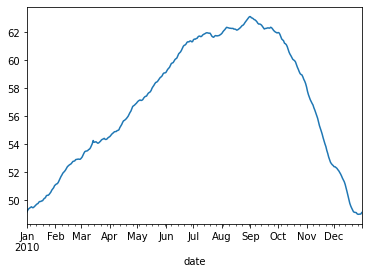

In [224]:
df_copy.temp.plot()


### 2. Write the code necessary to visualize the minimum temperature over time.


In [225]:
min_temp = df.resample('D').min()

In [226]:
min_temp.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


<AxesSubplot:xlabel='date'>

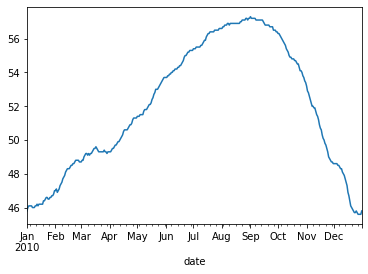

In [227]:
min_temp.temp.plot()

### 3. Write the code necessary to visualize the maximum temperature over time.


In [228]:
max_temp = df.resample('D').max()

In [229]:
max_temp.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


<AxesSubplot:xlabel='date'>

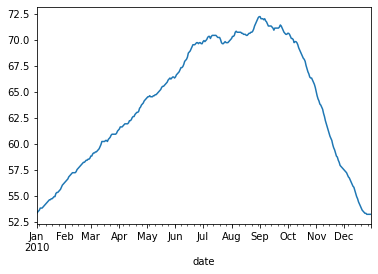

In [230]:
max_temp.temp.plot()

### 4. Which month is the coldest, on average?


In [100]:
df['month'] = df.index.month_name()

In [101]:
df.groupby('month').temp.mean().sort_values().idxmin()

'January'

In [232]:
df.resample('M').temp.mean().sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

### 5. Which month has the highest average temperature?


In [43]:
df.groupby('month').temp.mean().sort_values().nlargest(n=1, keep='all')

month
September    62.487083
Name: temp, dtype: float64

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [258]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [259]:
# create a new column team difference (daily max - daily min)

daily['temp_diff'] = daily['max'] - daily['min']
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [260]:
# Which month has the highest daily temperature variability?

daily.resample('M').max().temp_diff.sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: temp_diff, dtype: float64

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

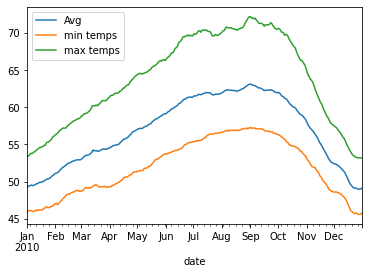

In [116]:
df.resample('D').mean().temp.plot(label = 'Avg')
df.resample('D').min().temp.plot(label = 'min temps')
df.resample('D').max().temp.plot(label = 'max temps')
plt.legend()


# or..
# df.temp.resample('D').agg(['min', 'mean', 'max']).plot()


In [118]:
from vega_datasets import data
df_seattle = data.seattle_weather()

In [119]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [120]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [121]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

df_seattle = df_seattle.set_index('date').sort_index()

In [125]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [248]:
df_seattle.resample('M').precipitation.sum().sort_values(ascending=False).head(1)


date
2015-12-31    284.5
Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.


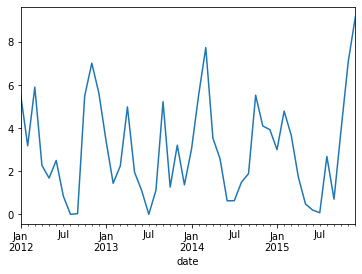

In [139]:
df_seattle.resample('M').precipitation.mean().plot()
plt.show()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


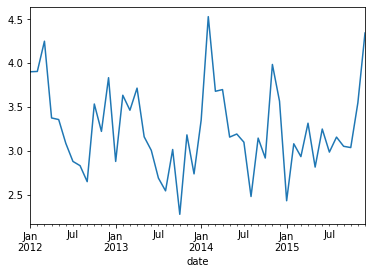

In [141]:
df_seattle.resample('M').wind.mean().plot()
plt.show()

<AxesSubplot:xlabel='date'>

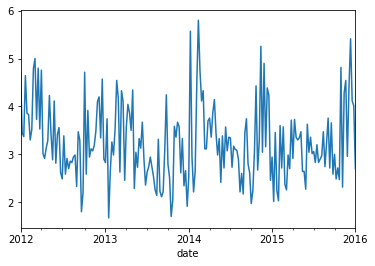

In [249]:
df_seattle.resample('W').wind.mean().plot()


### 4. Which year-month combination is the windiest?


In [142]:
df_seattle.resample('M').wind.max().sort_values(ascending=False).head(1)

date
2012-12-31    9.5
Name: wind, dtype: float64

In [143]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [144]:
df_sun = df_seattle[df_seattle.weather == 'sun']

In [145]:
df_sun.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun


In [147]:
df_sun = df_sun.weather.replace('sun', 1)

In [148]:
df_sun.head()

date
2012-01-08    1
2012-01-11    1
2012-01-12    1
2012-01-13    1
2012-02-02    1
Name: weather, dtype: int64

In [151]:
# find sunniest year
df_sun.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: weather, dtype: int64

### 6. In which month does it rain the most?


In [250]:
df_seattle['month'] = df_seattle.index.month

In [251]:
df_seattle.groupby('month').precipitation.max().sort_values(ascending=False).head(1)

month
3    55.9
Name: precipitation, dtype: float64

In [252]:
# total rainfall by month
df_seattle.resample('M').precipitation.max().sort_values(ascending=False).head(1)


date
2015-03-31    55.9
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?


In [253]:
df_seattle['nonzero_prec'] = df_seattle.precipitation != 0 

In [254]:
df_seattle['nonzero_prec'] = df_seattle['nonzero_prec'].replace(True, 1)

In [255]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,nonzero_prec
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,0.0
2012-01-02,10.9,10.6,2.8,4.5,rain,1,1.0
2012-01-03,0.8,11.7,7.2,2.3,rain,1,1.0
2012-01-04,20.3,12.2,5.6,4.7,rain,1,1.0
2012-01-05,1.3,8.9,2.8,6.1,rain,1,1.0


In [182]:
df_seattle.groupby('month').nonzero_prec.sum().nlargest(n=1, keep='all')


month
December    81.0
Name: nonzero_prec, dtype: float64

In [185]:
df_flights = data.flights_20k()

In [186]:
df_flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [187]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

df_flights = df_flights.set_index('date').sort_index()

In [188]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


### 1. Convert any negative delays to 0.


In [189]:
df_flights.delay = df_flights.delay.apply(lambda x: 0 if x < 0 else x)

In [190]:
df_flights.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
148        1
213        1
245        1
360        1
147        1
Name: delay, Length: 194, dtype: int64

### 2. Which hour of the day has the highest average delay?


In [194]:
df_flights['hour'] = df_flights.index.hour

In [201]:
df_flights.groupby('hour').delay.mean().sort_values(ascending=False).head(1)

hour
3    302.5
Name: delay, dtype: float64

###  3. Does the day of the week make a difference in the delay amount?


In [202]:
df_flights['day_name'] = df_flights.index.day_name()


In [257]:
df_flights.groupby('day_name').delay.mean().sort_values()

day_name
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

<AxesSubplot:xlabel='day_name'>

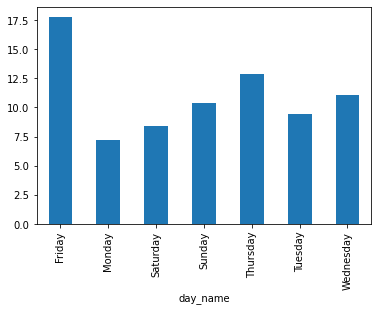

In [204]:
df_flights.groupby('day_name').delay.mean().plot(kind='bar')

### 4. Does the month make a difference in the delay amount?


In [205]:
df_flights['month'] = df_flights.index.month_name()


<AxesSubplot:xlabel='month'>

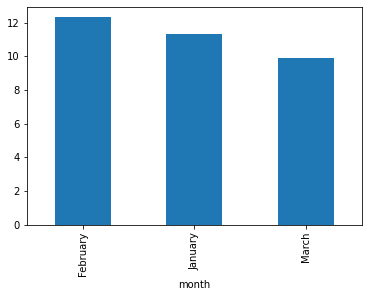

In [206]:
df_flights.groupby('month').delay.mean().plot(kind='bar')

### Bonus